In [317]:
#imports
#numby, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#allows charts to appear in notebook
%matplotlib inline
import pickle

In [586]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import SVC


In [319]:
from numpy.core.umath_tests import inner1d

In [320]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [40]:
#cross validation
from sklearn.cross_validation import train_test_split

C:\Users\TheDa\ANA\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [321]:
from sklearn.model_selection import train_test_split

In [322]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPaymentNextMonth
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [235]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                  30000 non-null int64
SEX                        30000 non-null int64
EDUCATION                  30000 non-null int64
MARRIAGE                   30000 non-null int64
AGE                        30000 non-null int64
PAY_0                      30000 non-null int64
PAY_2                      30000 non-null int64
PAY_3                      30000 non-null int64
PAY_4                      30000 non-null int64
PAY_5                      30000 non-null int64
PAY_6                      30000 non-null int64
BILL_AMT1                  30000 non-null int64
BILL_AMT2                  30000 non-null int64
BILL_AMT3                  30000 non-null int64
BILL_AMT4                  30000 non-null int64
BILL_AMT5                  30000 non-null int64
BILL_AMT6                  30000 non-null int64
PAY_AMT1                   30000 non-null int64
PAY_AMT2                   

In [15]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [17]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [18]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900          0          0          0          0          0         0   
29901      48750     103486      50590      50248      49387         0   
29902     168088     168955     161351     126198     124746    168096   
29903      17082      13333         99         99     172104     10018   
29904      56021      54126      58732      59306      59728      2600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0         0         0  
29901      6556      3250      1563      1208       781  
29902      6409      7335      4448      4519      5003  
29903     13333        99        99    172104     30013  
29904      4553      5800      2000      1000      1462  


In [19]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [20]:
from sklearn.cross_validation import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [22]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
model = LinearRegression(n_jobs=10)

In [26]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [27]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [28]:
#dependent variable
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [29]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [30]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
print(cross_val_score(modelRF, X_train, y_train)) 

[0.99472551 0.90659818 0.609618  ]


In [35]:
model.score(X_train,y_train)

1.0

In [36]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.96820756 0.93448367 0.63059135]


0.9412477578553939

In [37]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.04938813 -0.05328313 -0.0406331 ]


-0.03980222120360799

In [38]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[1. 1. 1.]


1.0

In [39]:
predictions = modelRF.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [41]:
from math import sqrt

In [42]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [43]:
predRsquared = r2_score(y_test,predictions)

In [44]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.630
RMSE: 24876.222


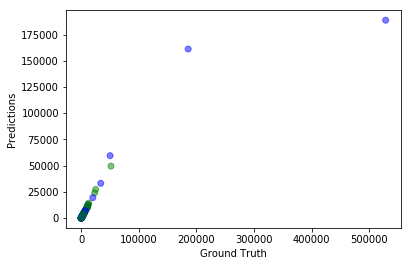

In [45]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

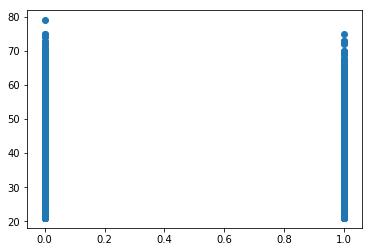

In [33]:
plt.scatter(rawData['DefaultPaymentNextMonth'],rawData['AGE'])

In [49]:
groupby_AGE = rawData.groupby('AGE')

In [50]:
groupby_AGE.groups

{21: Int64Index([  529,  1224,  1471,  2206,  2212,  3147,  3284,  3308,  4271,
              4390,  4485,  5235,  5483,  6013,  6086,  6429,  6733,  7141,
              7183,  7859,  7984,  8412,  8490,  8850,  9258,  9581, 11638,
             11904, 11930, 12305, 12350, 12353, 12556, 12924, 13705, 14103,
             14389, 15154, 15725, 15728, 16487, 16988, 16999, 18341, 18342,
             18344, 20374, 20377, 20407, 21546, 21576, 21598, 21719, 21720,
             21736, 23905, 23906, 23927, 23932, 23933, 25170, 25173, 25174,
             25182, 25302, 27630, 27662],
            dtype='int64'),
 22: Int64Index([   37,    42,    46,    69,    78,    98,   103,   134,   169,
               172,
             ...
             27762, 27768, 27856, 29194, 29195, 29202, 29210, 29211, 29226,
             29364],
            dtype='int64', length=560),
 23: Int64Index([    7,    15,    24,    25,    94,   125,   130,   142,   148,
               228,
             ...
             29228, 292

In [323]:
#binning the age into categories
bins=[20,25,35,50,65,80]
rawData['AGE']=pd.cut(rawData['AGE'], bins=bins, labels=False)

In [324]:
#features
features = rawData.iloc[:,2:11]
print('Summary of feature sample')
features.head()

Summary of feature sample


,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,1,0,2,2,-1,-1,-2,-2
1,2,2,1,-1,2,0,0,0,2
2,2,2,1,0,0,0,0,0,0
3,2,1,2,0,0,0,0,0,0
4,2,1,3,-1,0,-1,0,0,0


In [325]:
#dependent variable
depVar = rawData['DefaultPaymentNextMonth']

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
X_train, X_test, y_train, y_test = train_test_split(features,depVar,test_size=0.2)

In [328]:
len(X_train)

24000

In [329]:
len(X_test)

6000

In [330]:
X_test

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
29476,1,1,2,0,0,0,0,0,0
19080,1,2,1,0,0,0,0,0,0
8069,2,1,2,-2,-2,-2,-2,-2,-2
11191,1,2,1,1,-2,-1,0,0,2
4947,1,1,3,0,0,0,0,0,0
22465,3,2,2,0,0,0,0,0,0
27870,1,2,1,-2,-2,-2,-2,-2,-2
3963,2,2,0,2,2,2,2,2,2
25667,1,2,0,0,0,0,0,0,0
13199,1,2,1,-1,-1,-1,-1,-1,-1


In [61]:
#https://www.youtube.com/watch?v=fwY9Qv96DJY
#Training and Test Data Tutorial (for above)

In [281]:
from sklearn.linear_model import LogisticRegression
#https://www.youtube.com/watch?v=1nWFHa6K23w
#https://www.youtube.com/watch?v=XnOAdxOWXWg

In [282]:
model = LogisticRegression()

In [283]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [284]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [285]:
model.score(X_test,y_test)
#accuracy below is 81.1%

0.8098333333333333

In [311]:
score = model.score(X_test,y_test)

In [312]:
predictions = model.predict(X_test)
#ex. predictions = modelKNN.predict(X_test)

In [313]:
predAccuracy = accuracy_score(y_test, y_pred)

In [288]:
predAccuracy

0.6895

In [298]:
model.predict(X_test[121:160])

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [308]:
import seaborn as sns
from sklearn import metrics

In [309]:
cm = metrics.confusion_matrix(y_test, predictions)

In [316]:
print(cm)

[[4560  106]
 [1035  299]]


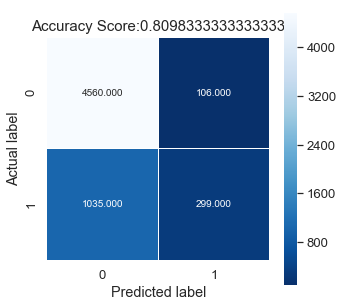

In [315]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score:{0}' .format(score)
plt.title(all_sample_title, size=15);

In [69]:
model.predict_proba(X_test)

array([[0.49118471, 0.50881529],
       [0.78349538, 0.21650462],
       [0.7918696 , 0.2081304 ],
       ...,
       [0.85541   , 0.14459   ],
       [0.80019119, 0.19980881],
       [0.80019119, 0.19980881]])

In [289]:
predKappa = cohen_kappa_score(y_test, predictions)

In [290]:
predKappa

0.26807833678660087

In [70]:
#https://www.youtube.com/watch?v=zM4VZR0px8E (above)


In [17]:
#Now to try SVM
#https://www.youtube.com/watch?v=N1vOgolbjSc
#https://www.youtube.com/watch?v=FB5EdxAGxQg

In [596]:
#Fit SVM model for all x attributes
model = SVC(kernel='rbf', C=1.75, gamma=2**-3.5)
#model = SVC(kernel='linear', C=1)

In [597]:
model.fit(X_train, y_train)


SVC(C=1.75, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.08838834764831845,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [598]:
model.score(X_test, y_test)

0.8185

In [599]:
score = model.score(X_test,y_test)

In [600]:
predictions = model.predict(X_test)
#ex. predictions = modelKNN.predict(X_test)

In [601]:
predAccuracy = accuracy_score(y_test, y_pred)


In [602]:
predAccuracy

0.6953333333333334

In [603]:
cm = metrics.confusion_matrix(y_test, predictions)

In [604]:
print(cm)

[[4433  224]
 [ 865  478]]


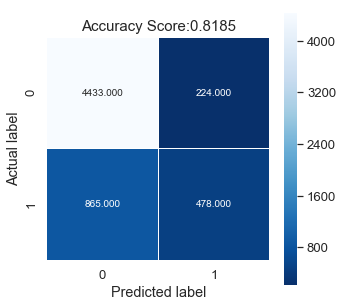

In [605]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score:{0}' .format(score)
plt.title(all_sample_title, size=15);

In [374]:
predKappa = cohen_kappa_score(y_test, predictions)

In [375]:
predKappa

0.3684506393858935

In [260]:
#Naive Bayes Classifiers
from sklearn.naive_bayes import BernoulliNB

In [261]:
#metrics
from sklearn.metrics import accuracy_score

In [262]:
BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, y_train)
print (BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))


BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.7985


In [263]:
predictions = BernNB.predict(X_test)

In [264]:
predAccuracy = accuracy_score(y_test, y_pred)

In [265]:
predAccuracy

0.7985

In [266]:
#https://stackoverflow.com/questions/43676905/how-to-calculate-cohens-kappa-coefficient-that-measures-inter-rater-agreement
#http://www.pmean.com/definitions/kappa.htm
from sklearn.metrics import cohen_kappa_score

In [267]:
predKappa = cohen_kappa_score(y_test, predictions)

In [268]:
predKappa

#one possible interpretation of Kappa:
#Poor agreement = Less than 0.20
#Fair agreement = 0.20 to 0.40
#Moderate agreement = 0.40 to 0.60
#Good agreement = 0.60 to 0.80
#Very good agreement = 0.80 to 1.00 

0.34554477848666576

In [269]:
print('Accuracy: %.3f' % predAccuracy)

Accuracy: 0.798


In [214]:
print('Kappa: %.3f' % predKappa)

Kappa: 0.360
